In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

data =[]
files = []
for f in glob.glob('*_Stages_Times_Sec.csv'):
    files.append(f)
    temp_df = pd.read_csv(f)
    data.append(temp_df)
    print(f'Δημιουργήθηκε dataframe για το {f} με {temp_df.shape}')


total = pd.concat(data, axis=0)

Δημιουργήθηκε dataframe για το Acropolis_Stages_Times_Sec.csv με (947, 7)
Δημιουργήθηκε dataframe για το Central European_Stages_Times_Sec.csv με (1082, 7)
Δημιουργήθηκε dataframe για το Chile_Stages_Times_Sec.csv με (729, 7)
Δημιουργήθηκε dataframe για το Croatia_Stages_Times_Sec.csv με (1065, 7)
Δημιουργήθηκε dataframe για το Estonia_Stages_Times_Sec.csv με (1017, 7)
Δημιουργήθηκε dataframe για το Finland_Stages_Times_Sec.csv με (1269, 7)
Δημιουργήθηκε dataframe για το Mexico_Stages_Times_Sec.csv με (654, 7)
Δημιουργήθηκε dataframe για το MonteCarlo_Stages_Times_Sec.csv με (1290, 7)
Δημιουργήθηκε dataframe για το Portugal_Stages_Times_Sec.csv με (1338, 7)
Δημιουργήθηκε dataframe για το Safari_Stages_Times_Sec.csv με (541, 7)
Δημιουργήθηκε dataframe για το Sardegna_Stages_Times_Sec.csv με (1261, 7)
Δημιουργήθηκε dataframe για το Sweden_Stages_Times_Sec.csv με (903, 7)


In [9]:
min_value = total.groupby(['Race', 'ss'])['time_SS_sec'].min()

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2


min_time
Race      ss          
Acropolis 1       92.9
          2      334.4
          3      676.8
          4      332.1
          5      771.7
...                ...
Sweden    14     501.8
          15     349.2
          16     761.0
          17     757.0
          18     342.0

[227 rows x 1 columns]

In [11]:
total_ss_times_F = total.merge(min_value2, on=['Race', 'ss'])
total_ss_times_F['SS.'] = total_ss_times_F['Race'] + '_' +  total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,Acropolis_01
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,Acropolis_01
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,Acropolis_01
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,Acropolis_01
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,Acropolis_01
...,...,...,...,...,...,...,...,...,...
12091,64,Otake Nao,RC4,18,Sweden,41,427.8,342.0,Sweden_18
12092,7,Loubet P.,RC1,18,Sweden,42,490.6,342.0,Sweden_18
12093,35,Al-Rashed,RC2,18,Sweden,43,507.1,342.0,Sweden_18
12094,26,Kaur Egon,RC2,18,Sweden,44,536.6,342.0,Sweden_18


In [12]:
total_ss_times_F['diff']=total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time']
total_ss_times_F['diff%']=(total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time'])/total_ss_times_F['min_time']*100
#total_ss_times_F['diff%']=total_ss_times_F['diff%'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F['Group'] = total_ss_times_F['Group'].astype(str)

total_ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.,diff,diff%
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,Acropolis_01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,Acropolis_01,0.3,0.322928
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,Acropolis_01,0.4,0.430571
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,Acropolis_01,0.5,0.538213
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,Acropolis_01,0.7,0.753498
...,...,...,...,...,...,...,...,...,...,...,...
12091,64,Otake Nao,RC4,18,Sweden,41,427.8,342.0,Sweden_18,85.8,25.087719
12092,7,Loubet P.,RC1,18,Sweden,42,490.6,342.0,Sweden_18,148.6,43.450292
12093,35,Al-Rashed,RC2,18,Sweden,43,507.1,342.0,Sweden_18,165.1,48.274854
12094,26,Kaur Egon,RC2,18,Sweden,44,536.6,342.0,Sweden_18,194.6,56.900585


In [13]:
total_ss_times_WRC = total_ss_times_F[total_ss_times_F['Group'].str.contains('RC1')]
total_ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.,diff,diff%
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,Acropolis_01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,Acropolis_01,0.3,0.322928
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,Acropolis_01,0.4,0.430571
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,Acropolis_01,0.5,0.538213
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,Acropolis_01,0.7,0.753498
...,...,...,...,...,...,...,...,...,...,...,...
12054,8,Tänak Ott,RC1,18,Sweden,4,342.7,342.0,Sweden_18,0.7,0.204678
12055,42,Breen Cra,RC1,18,Sweden,5,342.9,342.0,Sweden_18,0.9,0.263158
12056,11,Neuville,RC1,18,Sweden,6,344.7,342.0,Sweden_18,2.7,0.789474
12059,37,Bertelli,RC1,18,Sweden,9,359.8,342.0,Sweden_18,17.8,5.204678


In [14]:
total_ss_times_F4 = pd.pivot_table(total_ss_times_WRC, values='diff', 
                                index=['Race', 'SS.'], 
                                columns='Crew', dropna=True)
total_ss_times_F4

Crew                    Bertelli    Breen  Cra  Evans  Elf  Heller  Al  \
Race      SS.                                                            
Acropolis Acropolis_01         NaN         NaN         2.8         NaN   
          Acropolis_02         NaN         NaN         4.2         NaN   
          Acropolis_03         NaN         NaN         9.0         NaN   
          Acropolis_04         NaN         NaN         5.3         NaN   
          Acropolis_05         NaN         NaN        22.6         NaN   
...                            ...         ...         ...         ...   
Sweden    Sweden_14           33.5         3.6         5.6         NaN   
          Sweden_15           26.7        10.3         6.5         NaN   
          Sweden_16           57.8         4.5        16.2         NaN   
          Sweden_17           53.6         3.8        18.6         NaN   
          Sweden_18           17.8         0.9         0.6         NaN   

Crew                    Katsuta  T  Lappi  Esa  Latvala  J  Loubet  P.  \
Race      SS.                                                            
Acropolis Acropolis_01         1.3         0.3         NaN         1.7   
          Acropolis_02         9.2         6.8         NaN       600.0   
          Acropolis_03        11.3        10.4         NaN       600.0   
          Acropolis_04         8.5         3.8         NaN       600.0   
          Acropolis_05        17.8        16.1         NaN         NaN   
...                            ...         ...         ...         ...   
Sweden    Sweden_14           15.1         0.2         NaN        14.0   
          Sweden_15            3.6         3.0         NaN         6.5   
          Sweden_16           11.2         8.4         NaN        39.8   
          Sweden_17           11.4        16.7         NaN        31.6   
          Sweden_18            NaN         0.0         NaN       148.6   

Crew                    Munster  G  Neuville    Ogier  S.   Rovanperä   \
Race      SS.                                                            
Acropolis Acropolis_01         NaN         0.4         1.3         0.0   
          Acropolis_02         NaN         0.0         3.4         5.5   
          Acropolis_03         NaN         3.1         3.4         0.0   
          Acropolis_04         NaN         2.2         0.0         6.0   
          Acropolis_05         NaN         5.9        10.9        20.2   
...                            ...         ...         ...         ...   
Sweden    Sweden_14            NaN         0.0         NaN         3.7   
          Sweden_15            NaN         0.0         NaN         3.8   
          Sweden_16            NaN         2.7         NaN         0.0   
          Sweden_17            NaN         0.0         NaN         6.0   
          Sweden_18            NaN         2.7         NaN         0.7   

Crew                    Serderidis  Sordo  Dan  Suninen  T  Tänak  Ott  
Race      SS.                                                           
Acropolis Acropolis_01        10.6         0.5         NaN         0.7  
          Acropolis_02        44.1         6.4         NaN         3.9  
          Acropolis_03       103.9        12.3         NaN         7.2  
          Acropolis_04        43.4         6.0         NaN         3.8  
          Acropolis_05       113.2        17.6         NaN         0.0  
...                            ...         ...         ...         ...  
Sweden    Sweden_14            NaN         NaN         NaN         0.8  
          Sweden_15            NaN         NaN         NaN         4.0  
          Sweden_16            NaN         NaN         NaN         1.5  
          Sweden_17            NaN         NaN         NaN         6.9  
          Sweden_18            NaN         NaN         NaN         0.7  

[227 rows x 16 columns]

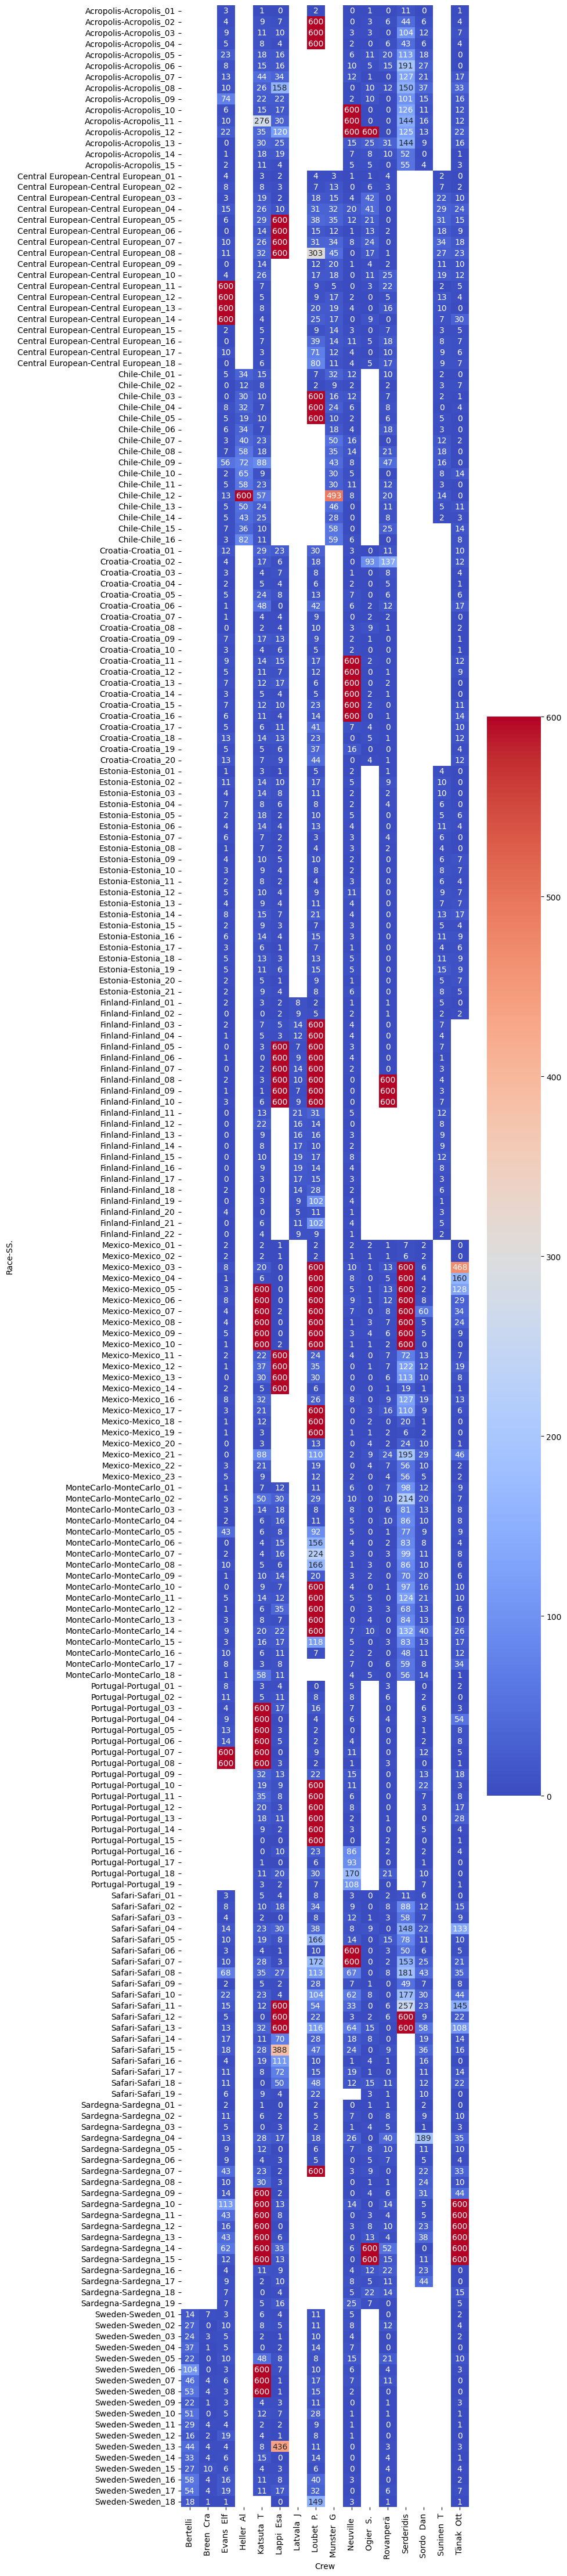

In [15]:
fig,ax = plt.subplots()
fig.set_size_inches(8,56)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F4, annot=True, fmt=',.0f', cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.savefig("Rc1.jpg")
plt.show()

In [16]:
total_ss_times_F5 = pd.pivot_table(total_ss_times_WRC, values='diff%', 
                                columns=['Race', 'SS.'], 
                                index='Crew', dropna=True)
total_ss_times_F5

Race          Acropolis                                                      \
SS.        Acropolis_01 Acropolis_02 Acropolis_03 Acropolis_04 Acropolis_05   
Crew                                                                          
Bertelli            NaN          NaN          NaN          NaN          NaN   
Breen  Cra          NaN          NaN          NaN          NaN          NaN   
Evans  Elf     3.013994     1.255981     1.329787     1.595905     2.928599   
Heller  Al          NaN          NaN          NaN          NaN          NaN   
Katsuta  T     1.399354     2.751196     1.669622     2.559470     2.306596   
Lappi  Esa     0.322928     2.033493     1.536643     1.144234     2.086303   
Latvala  J          NaN          NaN          NaN          NaN          NaN   
Loubet  P.     1.829925   179.425837    88.652482   180.668473          NaN   
Munster  G          NaN          NaN          NaN          NaN          NaN   
Neuville       0.430571     0.000000     0.458038     0.662451     0.764546   
Ogier  S.      1.399354     1.016746     0.502364     0.000000     1.412466   
Rovanperä      0.000000     1.644737     0.000000     1.806685     2.617598   
Serderidis    11.410118    13.187799    15.351655    13.068353    14.668913   
Sordo  Dan     0.538213     1.913876     1.817376     1.806685     2.280679   
Suninen  T          NaN          NaN          NaN          NaN          NaN   
Tänak  Ott     0.753498     1.166268     1.063830     1.144234     0.000000   

Race                                                                         \
SS.        Acropolis_06 Acropolis_07 Acropolis_08 Acropolis_09 Acropolis_10   
Crew                                                                          
Bertelli            NaN          NaN          NaN          NaN          NaN   
Breen  Cra          NaN          NaN          NaN          NaN          NaN   
Evans  Elf     0.758276     1.070375     1.009309    11.395923     0.566449   
Heller  Al          NaN          NaN          NaN          NaN          NaN   
Katsuta  T     1.359349     3.699958     2.528172     3.350834     1.333333   
Lappi  Esa     1.461069     2.873999    15.433611     3.412600     1.490196   
Latvala  J          NaN          NaN          NaN          NaN          NaN   
Loubet  P.          NaN          NaN          NaN          NaN          NaN   
Munster  G          NaN          NaN          NaN          NaN          NaN   
Neuville       0.878491     1.002950     0.000000     0.231624    52.287582   
Ogier  S.      0.453116     0.109566     0.960314     1.605930     0.017429   
Rovanperä      1.377844     0.000000     1.136698     0.000000     0.000000   
Serderidis    17.625301    10.703751    14.708476    15.657813    10.980392   
Sordo  Dan     2.487516     1.761483     3.606075     2.331686     0.984749   
Suninen  T          NaN          NaN          NaN          NaN          NaN   
Tänak  Ott     0.000000     1.449642     3.243508     2.393453     1.071895   

Race        ...    Sweden                                                     \
SS.         ... Sweden_09 Sweden_10 Sweden_11 Sweden_12  Sweden_13 Sweden_14   
Crew        ...                                                                
Bertelli    ...  6.870706  6.958305  5.972906  5.006180   6.054795  6.675967   
Breen  Cra  ...  0.437227  0.000000  0.841544  0.463535   0.561644  0.717417   
Evans  Elf  ...  0.905684  0.656186  0.800493  5.995056   0.616438  1.115982   
Heller  Al  ...       NaN       NaN       NaN       NaN        NaN       NaN   
Katsuta  T  ...  1.405372  1.585783  0.513136  1.297899   1.123288  3.009167   
Lappi  Esa  ...  0.936914  0.915926  0.328407  0.309023  59.739726  0.039857   
Latvala  J  ...       NaN       NaN       NaN       NaN        NaN       NaN   
Loubet  P.  ...  3.497814  3.786740  1.929392  2.533993   1.547945  2.789956   
Munster  G  ...       NaN       NaN       NaN       NaN        NaN       NaN   
Neuville    ...  0.000000  0.136705 

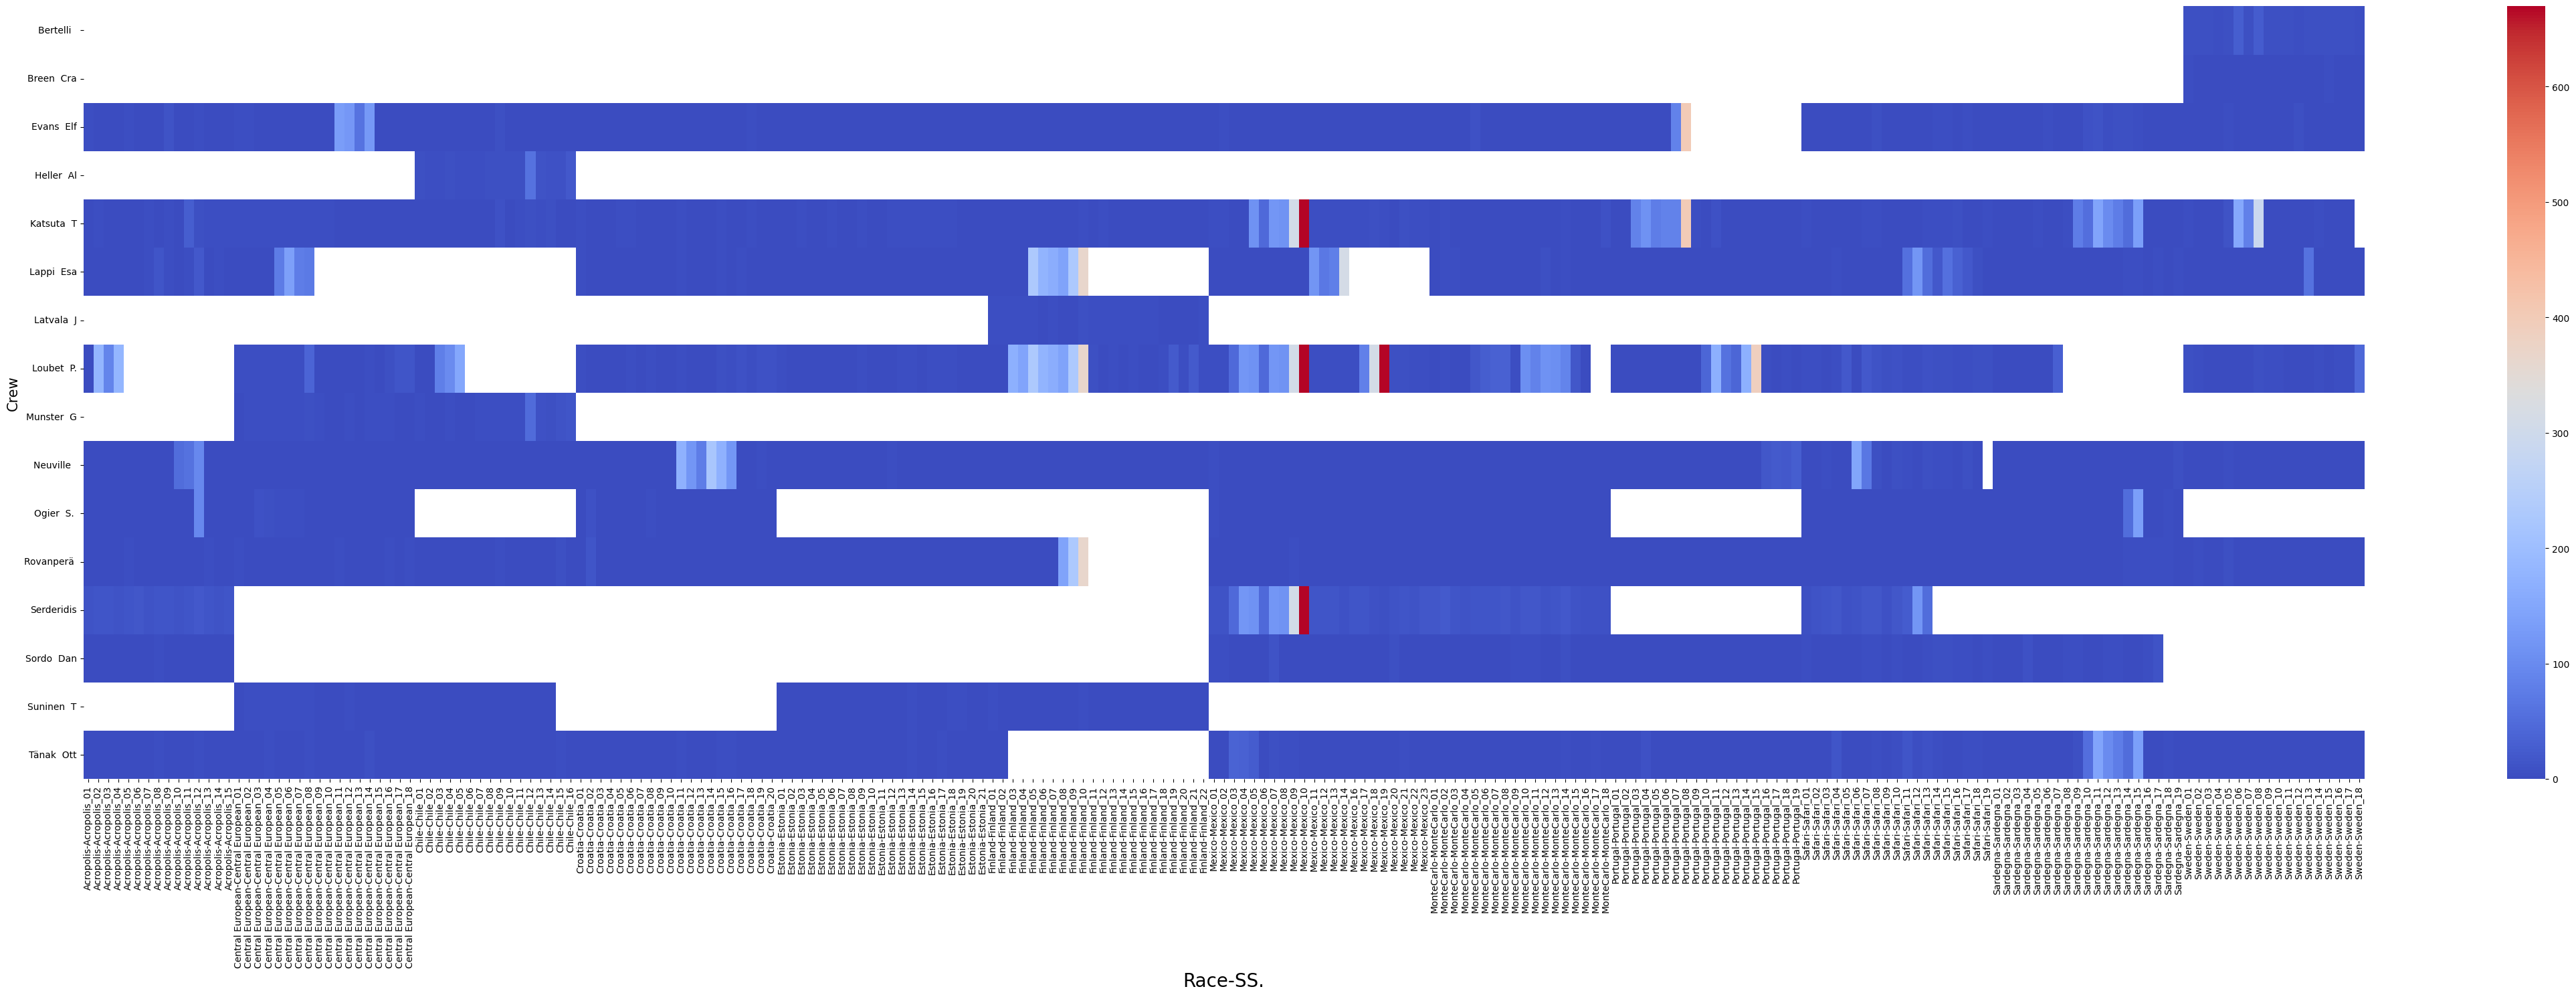

In [26]:
fig,ax = plt.subplots()
fig.set_size_inches(55,15)
ax.set(xlabel='Time', ylabel='Value')
ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F5, cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.savefig("Rc1_a.jpg")
plt.show()